In [58]:
%matplotlib inline

import heapq
from collections import defaultdict

import pandas as pd
import matplotlib.pylab as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split

In [59]:
# Load and preprocess data set 
df = pd.read_csv('CatalogCrossSell.csv')

In [60]:
df.head()

,Customer Number,Clothing Division,Housewares Division,Health Products Division,Automotive Division,Personal Electronics Division,Computers Division,Garden Division,Novelty Gift Division,Jewelry Division
0,11569,0,1,1,1,1,0,0,1,0
1,13714,0,1,1,1,1,0,1,1,1
2,46391,0,1,1,1,1,0,1,1,1
3,67264,0,0,1,1,1,0,1,1,0
4,67363,0,0,1,0,1,0,1,1,0


In [61]:
df.set_index('Customer Number', inplace = True)
df.head()

,Clothing Division,Housewares Division,Health Products Division,Automotive Division,Personal Electronics Division,Computers Division,Garden Division,Novelty Gift Division,Jewelry Division
Customer Number,,,,,,,,,
11569,0,1,1,1,1,0,0,1,0
13714,0,1,1,1,1,0,1,1,1
46391,0,1,1,1,1,0,1,1,1
67264,0,0,1,1,1,0,1,1,0
67363,0,0,1,0,1,0,1,1,0


In [62]:
df.shape

(4998, 9)

In [73]:
df.to_csv('./cleaned_data.csv')

In [63]:
df.isnull().sum()

Clothing Division                0
Housewares Division              0
Health Products Division         0
Automotive Division              0
Personal Electronics Division    0
Computers Division               0
Garden Division                  0
Novelty Gift Division            0
Jewelry Division                 0
dtype: int64

In [64]:
df.dtypes

Clothing Division                int64
Housewares Division              int64
Health Products Division         int64
Automotive Division              int64
Personal Electronics Division    int64
Computers Division               int64
Garden Division                  int64
Novelty Gift Division            int64
Jewelry Division                 int64
dtype: object

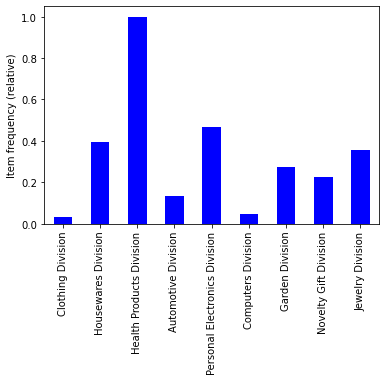

In [65]:
# determine item frequencies
itemFrequency = df.sum(axis=0) / len(df)

# and plot as histogram
ax = itemFrequency.plot.bar(color = 'blue')
plt.ylabel('Item frequency (relative)')
plt.show()

In [74]:
itemFrequency

Clothing Division                0.033013
Housewares Division              0.393557
Health Products Division         1.000000
Automotive Division              0.134854
Personal Electronics Division    0.467387
Computers Division               0.046819
Garden Division                  0.272109
Novelty Gift Division            0.227491
Jewelry Division                 0.356943
dtype: float64

In [66]:
# create frequent itemsets
itemsets = apriori(df, min_support = 0.10, use_colnames = True)
itemsets

,support,itemsets
0,0.393557,(Housewares Division)
1,1.000000,(Health Products Division)
2,0.134854,(Automotive Division)
3,0.467387,(Personal Electronics Division)
4,0.272109,(Garden Division)
5,0.227491,(Novelty Gift Division)
6,0.356943,(Jewelry Division)
7,0.393557,"(Housewares Division, Health Products Division)"
8,0.235494,"(Housewares Division, Personal Electronics Div..."
9,0.132853,"(Garden Division, Housewares Division)"


In [67]:
# and convert into rules
rules = association_rules(itemsets, metric = 'confidence', min_threshold = 0.5)

print('Number of rules', len(rules))

# Display 25 rules with highest lift
rules.sort_values(by=['lift'], ascending=False).head(25)


rules = rules.sort_values(by=['lift'], ascending=False).drop(columns=['antecedent support', 'consequent support', 'conviction']).head(50)
rules.head(25)

Number of rules 54


,antecedents,consequents,support,confidence,lift,leverage
25,"(Housewares Division, Novelty Gift Division)",(Personal Electronics Division),0.107843,0.799703,1.711009,0.044814
45,"(Housewares Division, Novelty Gift Division)","(Personal Electronics Division, Health Product...",0.107843,0.799703,1.711009,0.044814
42,"(Housewares Division, Novelty Gift Division, H...",(Personal Electronics Division),0.107843,0.799703,1.711009,0.044814
52,"(Jewelry Division, Personal Electronics Division)","(Housewares Division, Health Products Division)",0.132053,0.668693,1.699099,0.054333
28,"(Jewelry Division, Personal Electronics Division)",(Housewares Division),0.132053,0.668693,1.699099,0.054333
49,"(Jewelry Division, Personal Electronics Divisi...",(Housewares Division),0.132053,0.668693,1.699099,0.054333
44,"(Personal Electronics Division, Novelty Gift D...",(Housewares Division),0.107843,0.637870,1.620780,0.041305
26,"(Personal Electronics Division, Novelty Gift D...",(Housewares Division),0.107843,0.637870,1.620780,0.041305
46,"(Personal Electronics Division, Novelty Gift D...","(Housewares Division, Health Products Division)",0.107843,0.637870,1.620780,0.041305
35,(Novelty Gift Division),"(Personal Electronics Division, Health Product...",0.169068,0.743184,1.590082,0.062741


In [69]:
# Filter rules by number of antecedents (maximum 2) and consequents (maximum 1)
rules = rules[[len(c) <= 2 for c in rules.antecedents]]
rules = rules[[len(c) == 1 for c in rules.consequents]]

rules = rules.sort_values(by=['lift'], ascending=False).head(25)

In [71]:
rules.head()

,antecedents,consequents,support,confidence,lift,leverage
25,"(Housewares Division, Novelty Gift Division)",(Personal Electronics Division),0.107843,0.799703,1.711009,0.044814
28,"(Jewelry Division, Personal Electronics Division)",(Housewares Division),0.132053,0.668693,1.699099,0.054333
26,"(Personal Electronics Division, Novelty Gift D...",(Housewares Division),0.107843,0.637870,1.620780,0.041305
34,"(Novelty Gift Division, Health Products Division)",(Personal Electronics Division),0.169068,0.743184,1.590082,0.062741
11,(Novelty Gift Division),(Personal Electronics Division),0.169068,0.743184,1.590082,0.062741


In [72]:
rules.to_csv('./rules.csv')